# Import Libs

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

# Load Data

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# Preprocess

In [6]:
print('Train Images Shape:', X_train.shape)
print('Train Labels Shape:', y_train.shape)
print('Test Images Shape:', X_test.shape)
print('Test Labels Shape:', y_test.shape)

Train Images Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


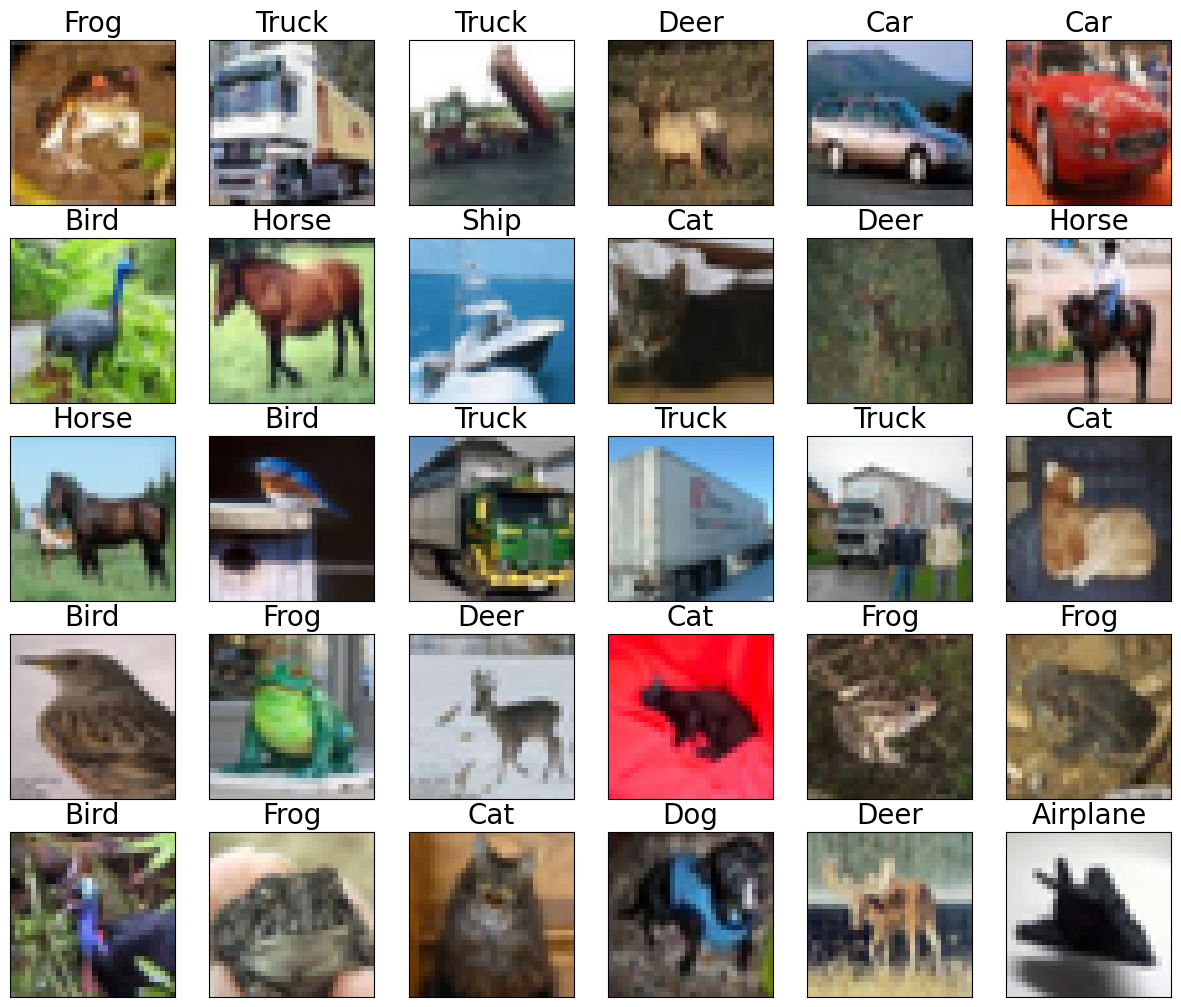

In [7]:
class_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(15,15))



for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i][0]], fontsize=20)
plt.show()

#*Normalization*

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

std_train = np.std(X_train)
std_test = np.std(X_test)

mean_train = np.mean(X_train)
mean_test = np.mean(X_test)

X_train = (X_train - mean_train)/(std_train)
X_test = (X_test - mean_test)/(std_test)

# One-Hot Encoding

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Data Augmentation

In [11]:
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.3,1])

In [12]:
aug = datagen.flow(X_train, y_train, batch_size= 64)

In [13]:
batch_0 = aug[0]
batch_0_images = aug[0][0]
batch_0_labels = aug[0][1]

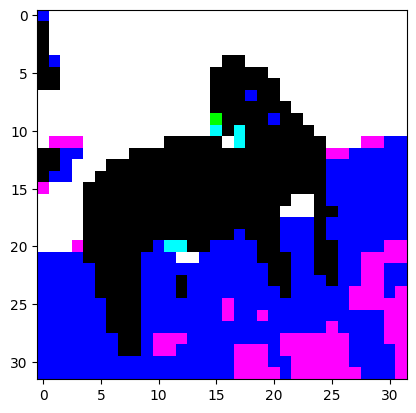

In [14]:
plt.imshow((aug[0][0][0]).astype(np.uint8))

In [15]:
aug[0][1][0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Model Architecture

In [16]:
model = Sequential()

#CNN
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())


#Classification
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

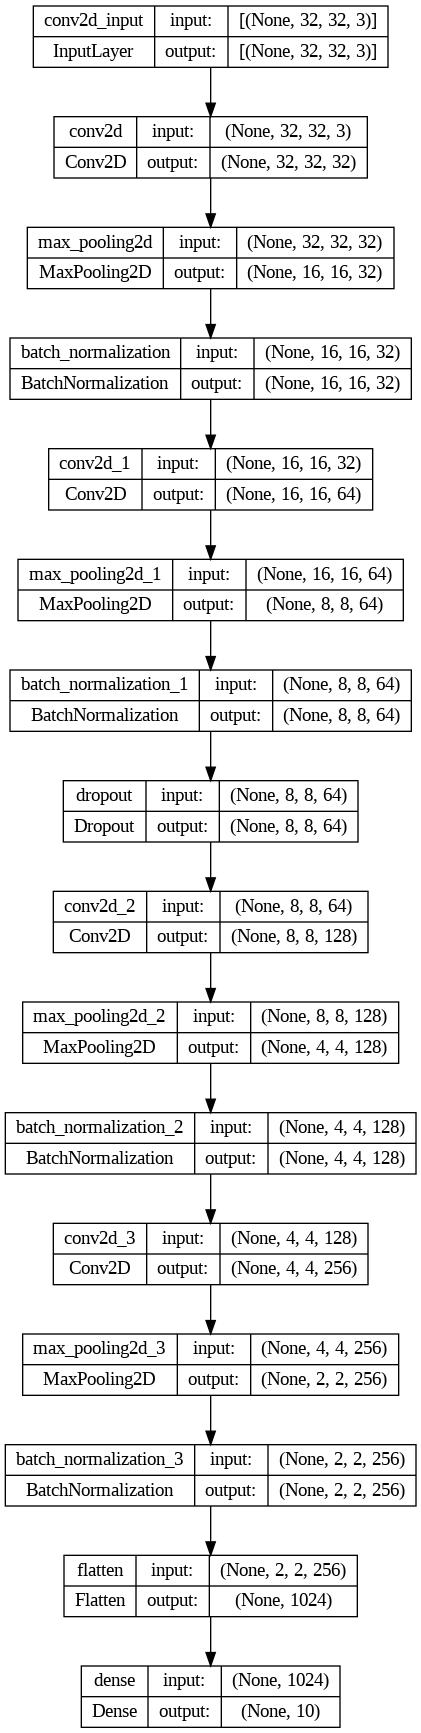

In [18]:
plot_model(model, 'model.jpg', show_shapes=True)

# Split Validation Data

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [20]:
#reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [21]:
#model_checkpoint = ModelCheckpoint('model1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Model Compile

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Fit

In [23]:
hist = model.fit(aug,
          epochs = 50,
          validation_data=(X_val, y_val),
         # callbacks=[reduce_learningrate, model_checkpoint],
          verbose=1,
          batch_size=64)

Epoch 1/50
782/782 [==============================] - 140s 177ms/step - loss: 1.7867 - accuracy: 0.3666 - val_loss: 1.6064 - val_accuracy: 0.4442
Epoch 2/50
782/782 [==============================] - 140s 179ms/step - loss: 1.5028 - accuracy: 0.4626 - val_loss: 1.3116 - val_accuracy: 0.5296
Epoch 3/50
782/782 [==============================] - 141s 180ms/step - loss: 1.3680 - accuracy: 0.5117 - val_loss: 1.3530 - val_accuracy: 0.5482
Epoch 4/50
782/782 [==============================] - 140s 179ms/step - loss: 1.2714 - accuracy: 0.5502 - val_loss: 1.2651 - val_accuracy: 0.5774
Epoch 5/50
782/782 [==============================] - 140s 179ms/step - loss: 1.2039 - accuracy: 0.5732 - val_loss: 1.0566 - val_accuracy: 0.6468
Epoch 6/50
782/782 [==============================] - 141s 180ms/step - loss: 1.1481 - accuracy: 0.5923 - val_loss: 1.1047 - val_accuracy: 0.6246
Epoch 7/50
782/782 [==============================] - 140s 179ms/step - loss: 1.1210 - accuracy: 0.6018 - val_loss: 1.0490 -

# Model Evaluation

In [24]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
hist.history['loss']

[1.7867152690887451,
 1.5028098821640015,
 1.3680012226104736,
 1.2714266777038574,
 1.203865885734558,
 1.1480906009674072,
 1.1210094690322876,
 1.0810316801071167,
 1.0516786575317383,
 1.0317366123199463,
 1.0049903392791748,
 0.9860597848892212,
 0.970574140548706,
 0.957858145236969,
 0.9440947771072388,
 0.9264329671859741,
 0.9142791628837585,
 0.904343843460083,
 0.895846426486969,
 0.884941041469574,
 0.8701180219650269,
 0.865828275680542,
 0.8585507869720459,
 0.8520385026931763,
 0.8424983024597168,
 0.8318667411804199,
 0.8302143216133118,
 0.8130863308906555,
 0.8111072778701782,
 0.8055137395858765,
 0.8077512383460999,
 0.8005144000053406,
 0.7948650121688843,
 0.789924144744873,
 0.786603569984436,
 0.7811928391456604,
 0.7842077612876892,
 0.7613288164138794,
 0.7628833651542664,
 0.7652208805084229,
 0.7638670206069946,
 0.7593469619750977,
 0.7544564008712769,
 0.7499540448188782,
 0.7476885914802551,
 0.7468822002410889,
 0.7381553649902344,
 0.741058349609375,
 0

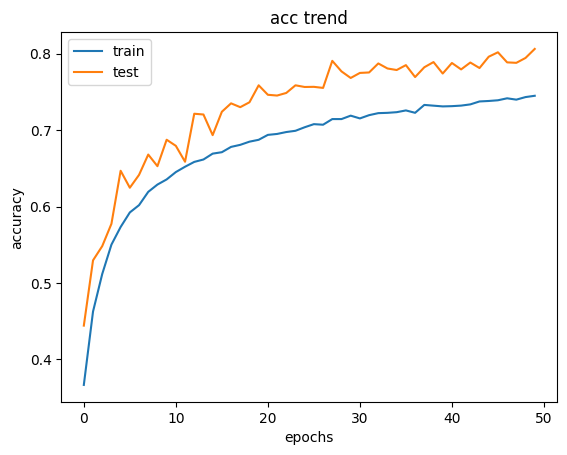

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acc trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

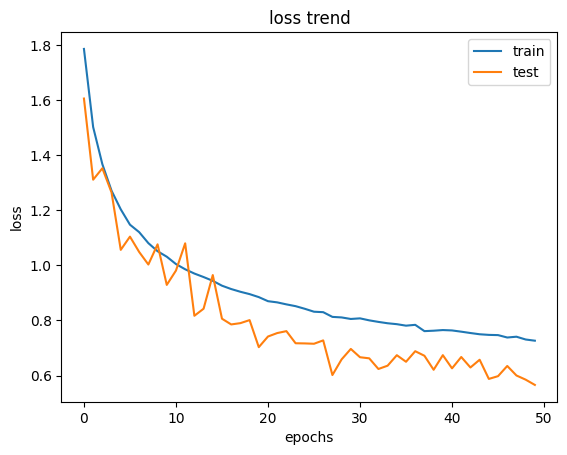

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_loss, test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.6882 - accuracy: 0.7739
0.688209056854248 0.7738999724388123


# Model Prediction

In [29]:
image = cv2.imread('dena.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

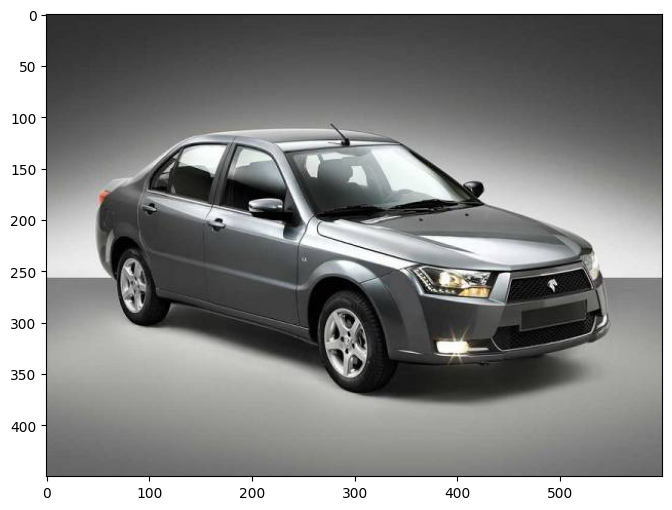

In [30]:
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

In [31]:
image = cv2.resize(image, (32,32))

image = image / 255.0

image = image.reshape((1, 32, 32, 3))

In [32]:
prediction = model.predict(image)

1/1 [==============================] - 0s 108ms/step


In [33]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_labels[predicted_class])

Predicted class:  Car
